In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 4.0 MB/s 
     |████████████████████████████████| 2.8 MB 15.1 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
from pypfopt import plotting

In [ ]:
# Get the data
df = pd.read_csv('/price_per_type.csv')
df = df.drop(columns = ['year_old'])
df

,price_red,price_white,price_sparkling
0,8.043190,9.824796,11.593846
1,10.265587,13.957194,12.666429
2,20.604955,22.223355,14.068462
3,31.324679,28.831116,17.962727
4,35.867722,37.803840,26.549310
5,41.217569,40.901059,42.931053
6,57.390727,51.540714,42.338125
7,56.577978,64.738077,75.862400
8,61.518309,36.756250,69.932000
9,116.301724,31.130000,59.711538


In [ ]:
# Portfolio optimization based on 10 year historical prices of red, white and sparkling wine
# This is a quadratic optimization problem to maximaze the Sharpe ratio

mu = mean_historical_return(df, frequency=1) # Indicate that we have yearly data
S = CovarianceShrinkage(df, frequency=1).ledoit_wolf()

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('price_red', 0.37576), ('price_white', 0.39242), ('price_sparkling', 0.23183)])
Expected annual return: 27.9%
Annual volatility: 40.6%
Sharpe Ratio: 0.64


(0.27856408880157946, 0.40569590889135887, 0.6373347207472585)

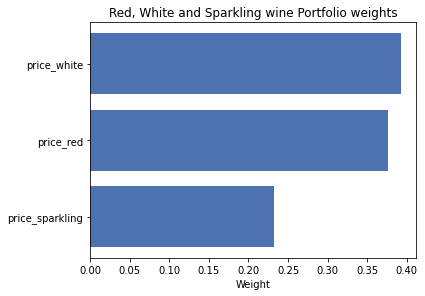

In [ ]:
# Plotting the portfolio weights
plotting.plot_weights(cleaned_weights)
plt.title('Red, White and Sparkling wine Portfolio weights')
plt.savefig('portfolio_weights1.png', bbox_inches='tight')

We can optimize the portfolio by investing:
- 39% in white wine
- 38% in red wine
- 23% in sparkling wine

This portfolio is expected to return 28% per year with a 40% volatility.

This is still a very risky portfolio, with high return.
We were not able to improve the Sharpe ratio to be above 1.
More research is needed to improve the performance of our wine investment.